In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *
import time

images = DDGS().images('bird photos', max_results=1)
urls = [img['image'] for img in images]

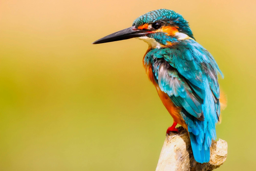

In [3]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

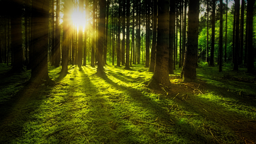

In [4]:
forest_images = DDGS().images('forest photos', max_results = 1)
forest_urls = [img['image'] for img in forest_images]

dest = 'forest.jpg'
download_url(forest_urls[0], dest, show_progress=False)
for_im = Image.open(dest)
for_im.to_thumb(256, 256)

In [6]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    more_images = DDGS().images(f'{o} photo', max_results = 200)
    more_urls = [img['image'] for img in more_images]
    download_images(dest, urls=more_urls)
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

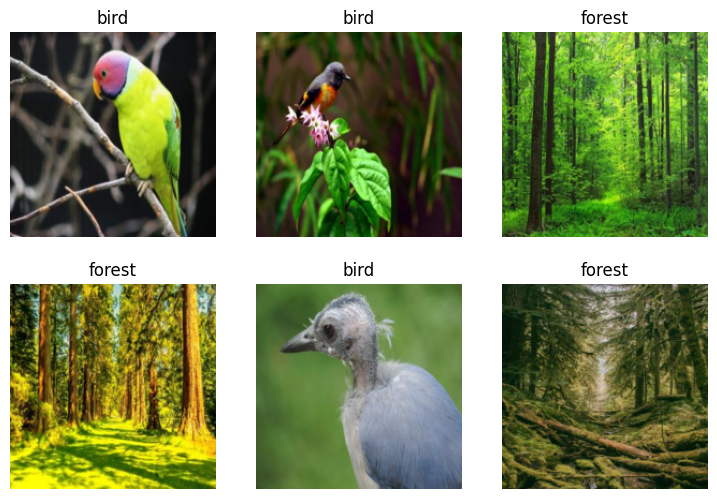

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\farah/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 41.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.793412,0.097293,0.039216,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.154165,0.023741,0.019608,00:07
1,0.111513,0.039978,0.019608,00:08
2,0.098413,0.019202,0.000000,00:07


In [12]:
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9721
